In [1]:
import sys
import os
import uproot
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats as st
import scipy

import peakutils

from datetime import datetime

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
### Import functions from peak_functions

repository_path = os.path.abspath('..')
sys.path.append(repository_path)

import peak_functions as pf
import fit_functions  as fitf
import blr_functions  as blr

In [4]:
plt.rcParams["figure.figsize"] = 9, 6
plt.rcParams["font.size"]      = 14

### Analysis npz data and prepare data:

In [11]:
evts_path = '/Users/romoluque_c/LEGEND/BACON/data_npz/'

all_channels = 9

int_subt_wfs_filt_dict = {}
num_triggers_ch_dict   = {}

pos_date1 = 44
pos_date2 = 54

def get_date(filename):
    date_str = filename[pos_date1:pos_date2]
    date = datetime.strptime(date_str, '%m_%d_%Y')
    return date

files        = os.listdir(evts_path)
filt_files   = [file for file in files if file.startswith("BACoN_sig_processing_light_model_ntrigg")]
sorted_files = sorted(filt_files, key=get_date)

for filename in sorted_files:
    my_file = evts_path+filename
    d = np.load(my_file, allow_pickle=True)
    
    date = filename[pos_date1:pos_date2]
    
    if date not in int_subt_wfs_filt_dict:
        int_subt_wfs_filt = [np.array([]) for _ in range(all_channels)]
        num_triggers_ch   = [np.array([]) for _ in range(all_channels)]

    for channel in range(all_channels):
        if channel==3:
            continue
        int_subt_wfs_filt[channel] = np.append(int_subt_wfs_filt[channel], d['int_subt_wfs_filt'][channel])
        num_triggers_ch  [channel] = np.append(num_triggers_ch  [channel], d['num_triggers_ch']  [channel])
        
    int_subt_wfs_filt_dict[date] = np.array(int_subt_wfs_filt, dtype=object)
    num_triggers_ch_dict  [date] = np.array(num_triggers_ch,   dtype=object)

In [12]:
int_subt_wfs_filt_dict;
num_triggers_ch_dict

{'05_22_2023': array([array([17069., 16631., 16770., 16535., 16721., 14868., 17341., 16381.,
               16387., 17236., 16669., 17361., 17294., 16660., 17965., 16968.,
               17605., 17502., 16897., 17431., 17012., 16813., 19094., 19016.,
               16828., 20155., 17200., 17820., 19971., 19324., 17815., 18073.,
               17213., 19007., 19145., 17100., 17863., 16085., 18233., 20003.,
               20130., 18548., 16326., 18167., 19988., 18000.])               ,
        array([13528., 13173., 13144., 13050., 13265., 11739., 14032., 13132.,
               12907., 13979., 13519., 13895., 13927., 13573., 13999., 13721.,
               14255., 14303., 13837., 13762., 13781., 13720., 15085., 14889.,
               13687., 17698., 13907., 13942., 17086., 15375., 13808., 14156.,
               14122., 14932., 15164., 13708., 13957., 12672., 14165., 17195.,
               17484., 14499., 12861., 14189., 17282., 14130.])               ,
        array([11792., 11459., 11541

In [35]:
sipm_gains = np.array([129.415, 122.037, 129.645, 0.0, 226.797, 112.980, 211.381, 213.928, 220.099])

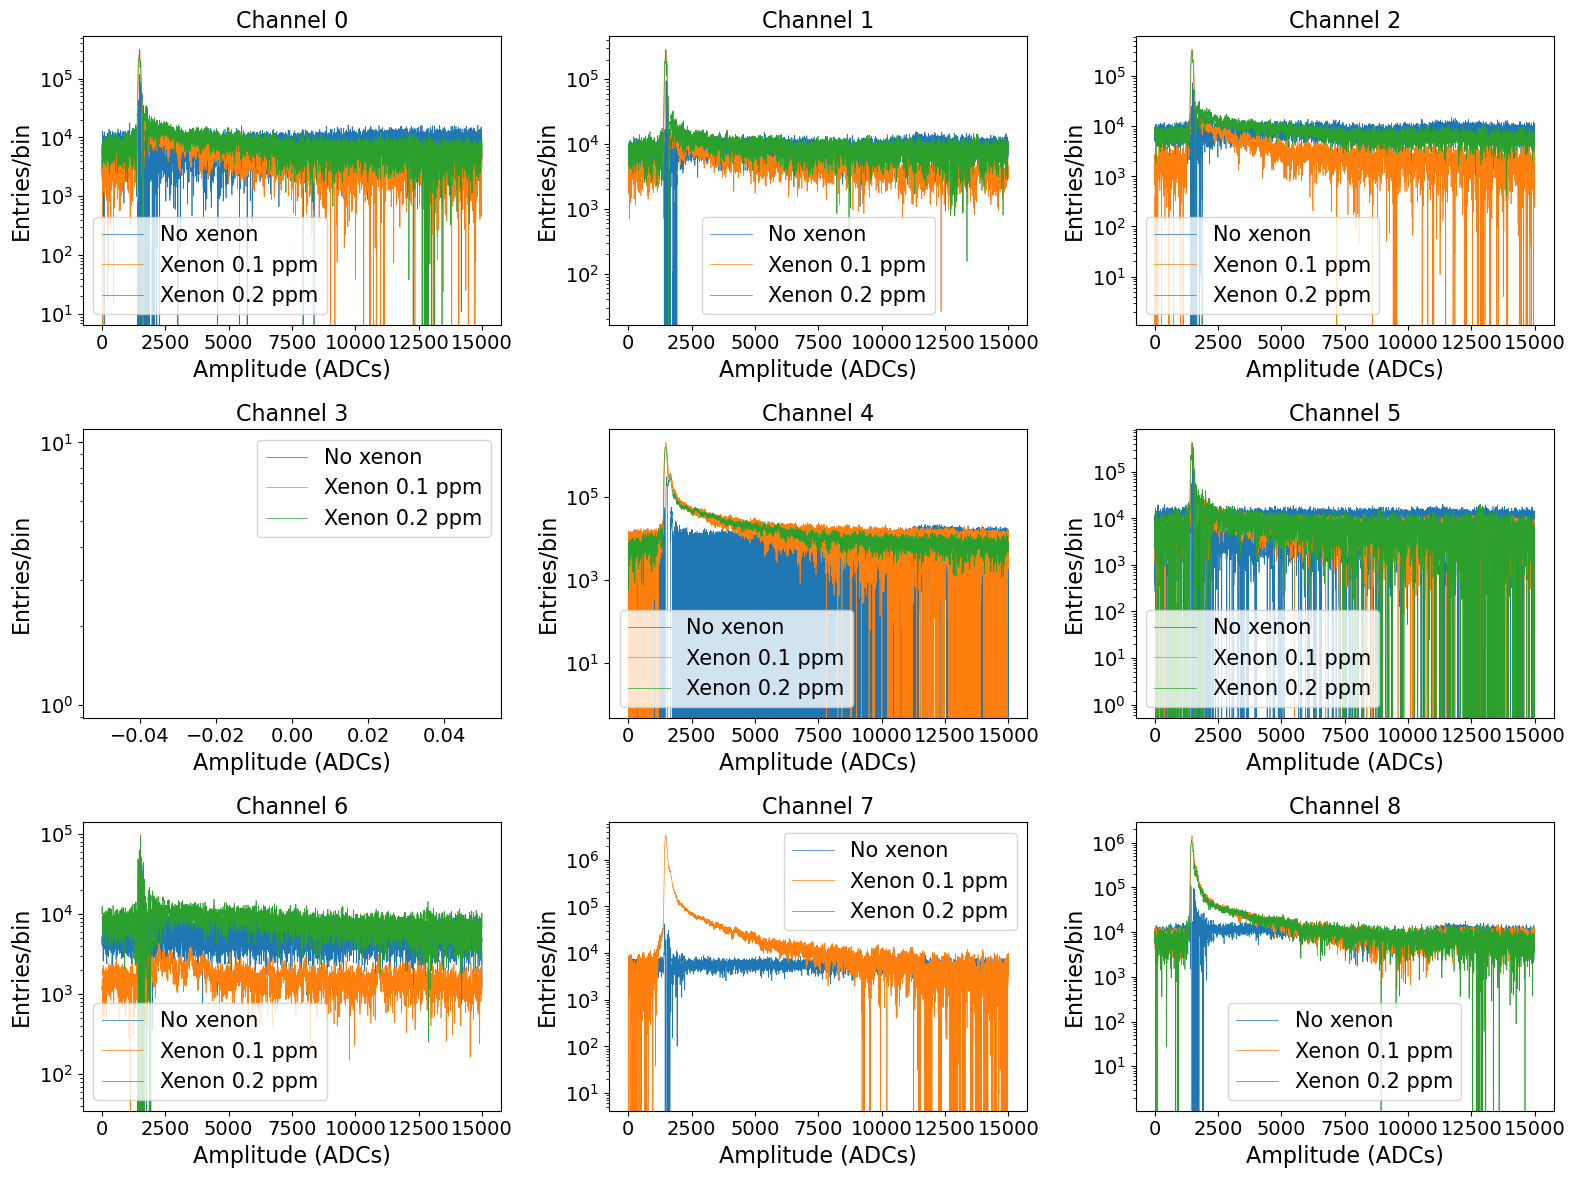

In [21]:
select_date1 = '05_22_2023'
select_date2 = '06_01_2023'
select_date3 = '07_06_2023'

fig, axs = plt.subplots(3, 3, figsize=(16, 12))
for k in range(9):
    i = int(k/3)
    j = k%3
    wf1 = int_subt_wfs_filt_dict[select_date1][k][:7500]
    wf2 = int_subt_wfs_filt_dict[select_date2][k][:7500]
    wf3 = int_subt_wfs_filt_dict[select_date3][k][:7500]
    axs[i][j].plot(2*np.arange(len(wf1)), wf1, linewidth=0.5, label=f'No xenon')
    axs[i][j].plot(2*np.arange(len(wf2)), wf2, linewidth=0.5, label=f'Xenon 0.1 ppm')
    axs[i][j].plot(2*np.arange(len(wf3)), wf3, linewidth=0.5, label=f'Xenon 0.2 ppm')
    axs[i][j].set_xlabel('Amplitude (ADCs)', fontsize=16)
    axs[i][j].set_ylabel('Entries/bin',      fontsize=16)
    axs[i][j].set_title(f"Channel {k}",      fontsize=16)
    axs[i][j].legend(fontsize=15)
    axs[i][j].set_yscale('log')
plt.tight_layout()
plt.show()

In [20]:
len(int_subt_wfs_filt_dict[select_date1][k])/7500, len(num_triggers_ch_dict[select_date1][k])

(46.0, 46)

In [27]:
def sum_wfs_files(data, chunk_size=7500):
    num_chunks = len(data) // chunk_size
    sum_chunks = np.array([])
    for i in range(num_chunks):
        if i == 0:
            sum_chunks = data[:chunk_size]
        else:
            start = i * chunk_size
            end   = (i + 1) * chunk_size
            chunk = data[start:end]
            sum_chunks = np.add(sum_chunks, chunk)
    return sum_chunks

In [28]:
num_triggers_ch_dict[select_date1][k]

array([17588., 19047., 19323., 19110., 17968., 16594., 15487., 16945.,
       15257., 15178., 16196., 17790., 18205., 16173., 19604., 14767.,
       16782., 15882., 16020., 19777., 17055., 16269., 20941., 20116.,
       17321., 20439., 15984., 19487., 19334., 20588., 20424., 21011.,
       14357., 19869., 20503., 16231., 18788., 18594., 20515., 20490.,
       20957., 19694., 13231., 21080., 21137., 20485.])

In [30]:
sum_wfs_dict = {}
for key, vals in int_subt_wfs_filt_dict.items():
    #print(key, vals)
    print(key, len(num_triggers_ch_dict[key]))
    sum_ntrigg        = np.array([np.sum(val) for val in num_triggers_ch_dict[key]])
    sum_wfs_dict[key] = np.array([sum_wfs_files(val) for val in vals])/sum_ntrigg

05_22_2023 9
06_01_2023 9
07_06_2023 9


In [20]:
sum_wfs_dict;

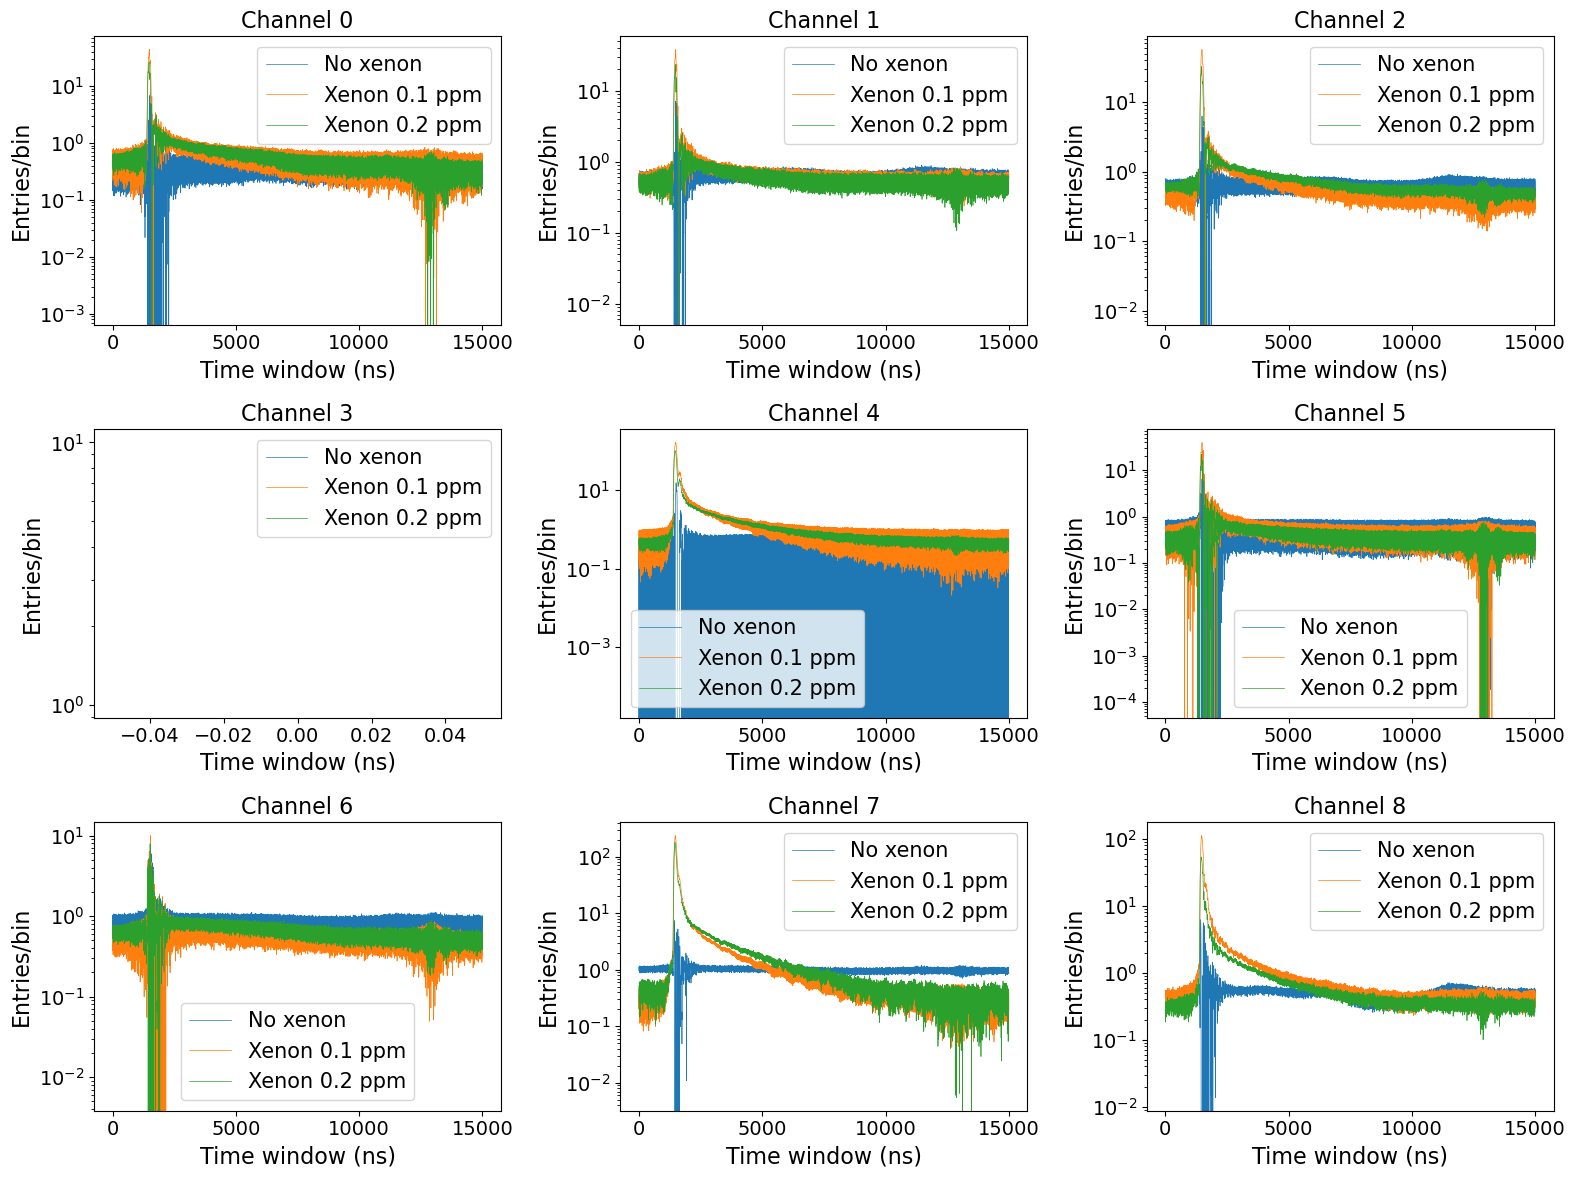

In [31]:
select_date1 = '05_22_2023'
select_date2 = '06_01_2023'
select_date3 = '07_06_2023'

fig, axs = plt.subplots(3, 3, figsize=(16, 12))
for k in range(9):
    i = int(k/3)
    j = k%3
    wf1 = sum_wfs_dict[select_date1][k]
    wf2 = sum_wfs_dict[select_date2][k]
    wf3 = sum_wfs_dict[select_date3][k]
    axs[i][j].plot(2*np.arange(len(wf1)), wf1, linewidth=0.5, label=f'No xenon')
    axs[i][j].plot(2*np.arange(len(wf2)), wf2, linewidth=0.5, label=f'Xenon 0.1 ppm')
    axs[i][j].plot(2*np.arange(len(wf3)), wf3, linewidth=0.5, label=f'Xenon 0.2 ppm')
    axs[i][j].set_xlabel('Time window (ns)', fontsize=16)
    axs[i][j].set_ylabel('Entries/bin',      fontsize=16)
    axs[i][j].set_title(f"Channel {k}",      fontsize=16)
    axs[i][j].legend(fontsize=15)
    axs[i][j].set_yscale('log')
plt.tight_layout()
plt.show()

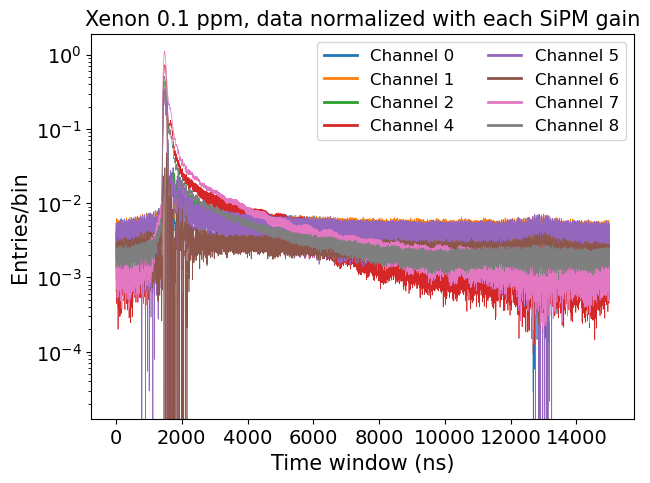

In [41]:
select_date = '06_01_2023'

plt.figure(figsize=(7, 5))
for k in range(9):
    i  = int(k/3)
    j  = k%3
    if k==3: continue
    wf = sum_wfs_dict[select_date][k]/sipm_gains[k]
    plt.plot(2*np.arange(len(wf)), wf, linewidth=0.5, label=f'Channel {k}')
    plt.xlabel('Time window (ns)', fontsize=15)
    plt.ylabel('Entries/bin',      fontsize=15)
plt.title(f"Xenon 0.1 ppm, data normalized with each SiPM gain", fontsize=15)
leg = plt.legend(fontsize=12, ncol=2)
for line in leg.get_lines():
    line.set_linewidth(2)
plt.yscale('log')
plt.show()

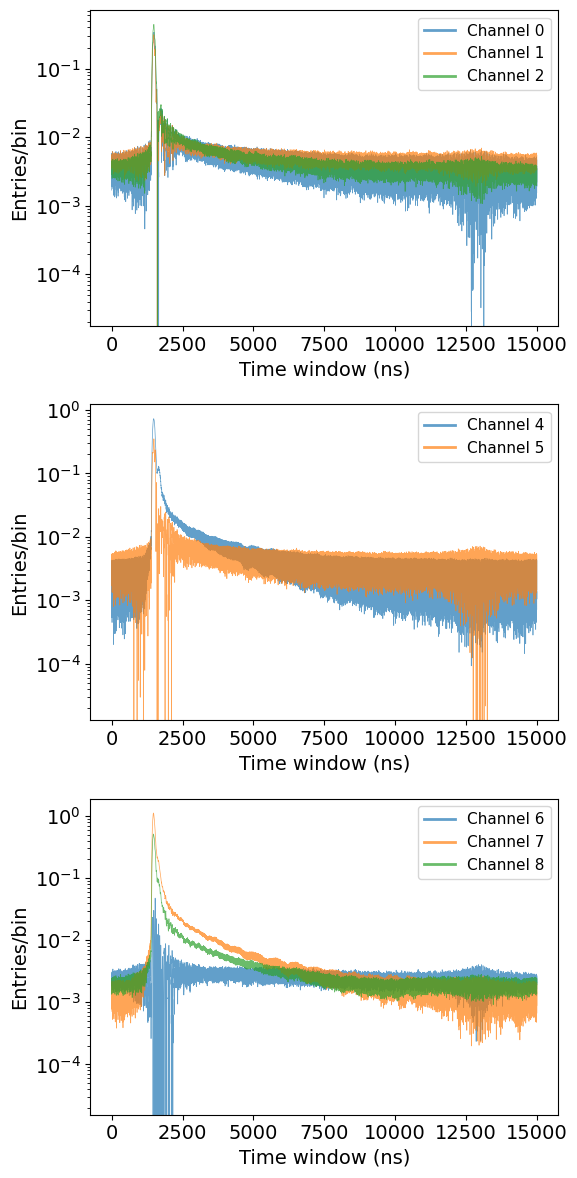

In [43]:
select_date = '06_01_2023'
fig, axs = plt.subplots(3, 1, figsize=(6, 12))
for k in range(9):
    i  = int(k/3)
    if k==3: continue
    wf = sum_wfs_dict[select_date][k]/sipm_gains[k]
    axs[i].plot(2*np.arange(len(wf)), wf, linewidth=0.5, label=f'Channel {k}', alpha=0.7)
    axs[i].set_xlabel('Time window (ns)', fontsize=14)
    axs[i].set_ylabel('Entries/bin',      fontsize=14)
    axs[i].set_yscale('log')
    leg = axs[i].legend(fontsize=11)
    for line in leg.get_lines():
        line.set_linewidth(2)

plt.tight_layout()
plt.show()

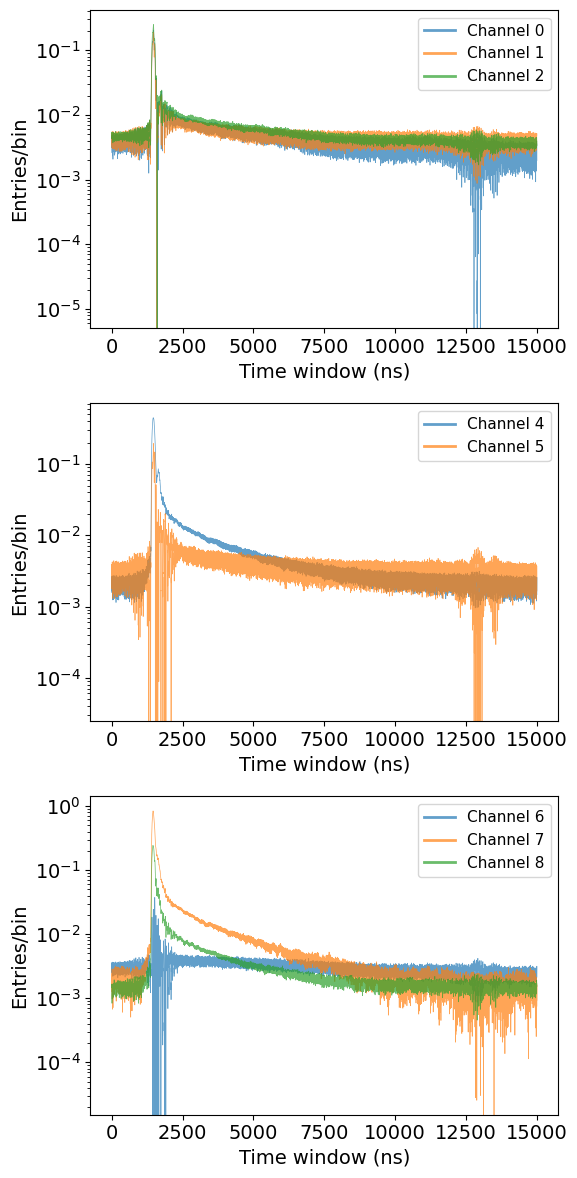

In [44]:
select_date = '07_06_2023'
fig, axs = plt.subplots(3, 1, figsize=(6, 12))
for k in range(9):
    i  = int(k/3)
    if k==3: continue
    wf = sum_wfs_dict[select_date][k]/sipm_gains[k]
    axs[i].plot(2*np.arange(len(wf)), wf, linewidth=0.5, label=f'Channel {k}', alpha=0.7)
    axs[i].set_xlabel('Time window (ns)', fontsize=14)
    axs[i].set_ylabel('Entries/bin',      fontsize=14)
    axs[i].set_yscale('log')
    leg = axs[i].legend(fontsize=11)
    for line in leg.get_lines():
        line.set_linewidth(2)

plt.tight_layout()
plt.show()

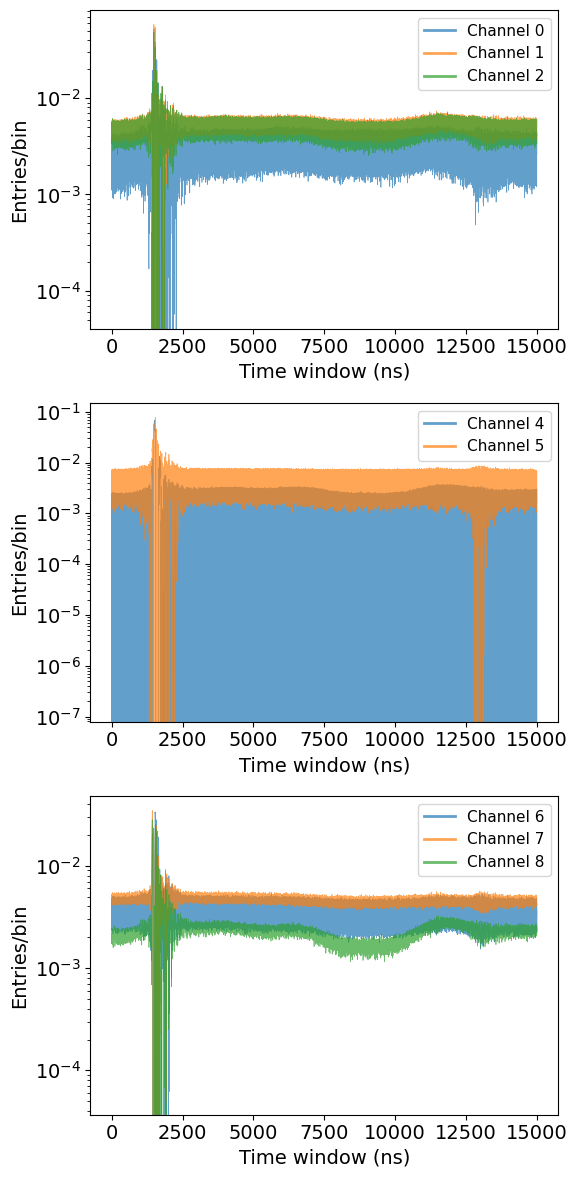

In [45]:
select_date = '05_22_2023'
fig, axs = plt.subplots(3, 1, figsize=(6, 12))
for k in range(9):
    i  = int(k/3)
    if k==3: continue
    wf = sum_wfs_dict[select_date][k]/sipm_gains[k]
    axs[i].plot(2*np.arange(len(wf)), wf, linewidth=0.5, label=f'Channel {k}', alpha=0.7)
    axs[i].set_xlabel('Time window (ns)', fontsize=14)
    axs[i].set_ylabel('Entries/bin',      fontsize=14)
    axs[i].set_yscale('log')
    leg = axs[i].legend(fontsize=11)
    for line in leg.get_lines():
        line.set_linewidth(2)

plt.tight_layout()
plt.show()